In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
%matplotlib inline

## Standardization of Normal Random Variable

**If $X$ is normal random variable with mean and std equal to $\mu, sigma$, $\frac{X-\mu}{\sigma}$ is standardized normal random variable and its distribution is also called z-distribution, with mean equal to 0 and variance equal to 1. **

**Practice:** For any normal random variable $X$, find $5\%$ and $95\%$ quantiles of $\frac{X-\mu}{\sigma}$. 

 $\frac{X-\mu}{\sigma}$ follows z-distribution, and quantiles can be computed directly 

In [7]:
z_left=norm.ppf(0.05,0,1)
z_right=norm.ppf(0.95,0,1)
z_left,z_right

(-1.6448536269514729, 1.6448536269514722)

We can visualize this 

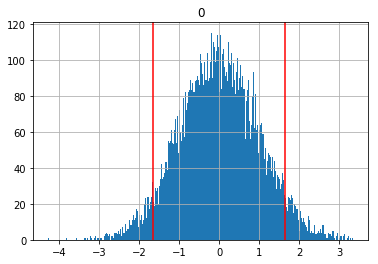

In [11]:
pop=pd.DataFrame(normal(0,1,10000))
pop.hist(bins=300)
plt.axvline(x=z_left,color='red')
plt.axvline(x=z_right,color='red')
plt.show()

The probability for  $\frac{X-\mu}{\sigma}$  to take values between $z\_left$ and  $z\_right$ is $90\%$. That is 
$$
P(z\_{left}\le \frac{X-\mu}{\sigma}\le z\_right)=90\%
$$

## Confidence Interval of Population Mean

Now let us consider sample mean, whose mean and standard deviation is $(\mu,\frac{\sigma}{n})$. Then 
$$
P(z\_{left}\le \frac{X-\mu}{\frac{\sigma}{\sqrt{n}}}\le z\_right)=90\%
$$

The equality above be transformed **equivalently** into
$$
P(\bar{x}+ z\_left\frac{\sigma}{\sqrt{n}}\le \mu \le \bar{x}+ z\_right\frac{\sigma}{\sqrt{n}})=90\%
$$

"equivalently" means that, the transforming steps do not change the inequality. But the new equation can be interpreted in a different way: We take many samples, compute sample mean for each sample and build a interval 
$$
\left[\bar{x}+z\_left\frac{\sigma}{\sqrt{n}},~\bar{x}+z\_right\frac{\sigma}{\sqrt{n}}\right]
$$
using each sample mean. Then out of these intervals, $90\%$ of them will include the real population mean. 

Moreover, we have the following 

**Given a sample, we can build a interval 
$$
\left[\bar{x}+z\_left\frac{\sigma}{\sqrt{n}},~\bar{x}+z\_right\frac{\sigma}{\sqrt{n}}\right]
$$
where $z\_left,z\_right$ are quantiles, and the tail probability is $\frac{\alpha}{2}$. Then this interval is called $1-\alpha$ confidence interval for population mean. $1-\alpha$ is called "confidence level". **

If the population mean is unknown, the chance for it to locate in this interval is $1-\alpha$. 

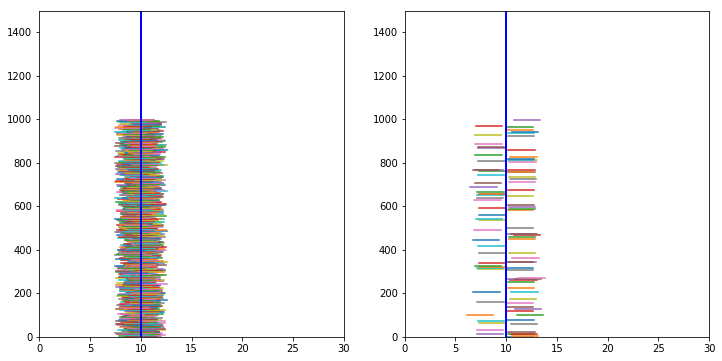

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for k in range(1000):
    sample=np.random.normal(10,5,size=40) # take  sample from normal popualtion with mean=10,std=5
    left=sample.mean()-1.645*5/np.sqrt(40)
    right=sample.mean()+1.645*5/np.sqrt(40)
    if (left<=10 and  right>=10):
        plt.plot([left,right],[k,k])
    plt.axvline(x=10,color='b')
    plt.ylim(0,1500)
    plt.xlim(0,30)
plt.subplot(1,2,2)
for k in range(1000):
    sample=np.random.normal(10,5,size=40) # take  sample from normal popualtion with mean=10,std=5
    left=sample.mean()-1.645*5/np.sqrt(40)
    right=sample.mean()+1.645*5/np.sqrt(40)
    if (left>10 or  right<10):
        plt.plot([left,right],[k,k])
    plt.axvline(x=10,color='b')
    plt.ylim(0,1500)
    plt.xlim(0,30)

From the simulation above, roughly 90% intervals include the true population mean. 

**Practice:** Find $95\%$  confidence interval for population mean with the following sample. We already know that the population std is 10.

In [16]:
sample=pd.DataFrame([ 11.57274133, -12.29696769,   6.33505555,  -9.54469401,
         9.67198932,   4.57720636,   1.60063722,  -5.97014939,
        14.98548738,  -0.64952653,   8.69204073,   0.9721044 ,
        26.21966943,  19.99349155, -17.85880387,  10.48294984,
       -12.72372222,  21.6761483 ,   2.11137471,  19.37803895,
        11.29246672,  -0.85621911,  11.4390657 ,   8.96803503,
        16.00064013,  18.43823815,  -4.33878532,  10.74209697,
        -3.77708137,  -4.45321694,  14.79028259,  15.61980402,
        15.32341725,  28.37416721,  -5.95173445,   0.16898348,
         2.94516976,  14.49400731,  16.45597568, -10.76417327,
        12.9736087 ,  10.71782803,   8.72998223,  14.81892958,
        -0.92420912,   3.6616481 ,   3.37707923,  30.0596042 ,
        16.56226835,   1.8114003 ])

**Solution:**

In [17]:
z_left=norm.ppf(0.025)
z_right=norm.ppf(0.975)
samplemean=sample[0].mean()
samplestd=10/(sample.shape[0])**0.5
z_left,z_right

(-1.9599639845400545, 1.959963984540054)

In [19]:
Interval_left=samplemean+z_left*samplestd
Interval_right=samplemean+z_right*samplestd
Interval_left,Interval_right

(4.3466793613006445, 9.8902946586993572)

From this problem , we find that, two conditions must be satisfied

- Population is normal so that sample mean is normal 
- Population std has to be known. 

From central limit theorem, we know that, population is not necessarily normal, as long as sample size is big. 
But what if population std is unknown?

**If population std is unknown, we can replace it with sample std. The interval and related conclusion will not be changed if sample size is large enough. **

## Confidence intervals for the mean of daily return

In [26]:
aapl=pd.DataFrame.from_csv('data/apple.csv')

In [28]:
aapl['logReturn']=np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])

In previous section, we use sample mean and standard deviation taking place of population mean and standard deviation. In this section, we will use them to build 80% confidence interval for population mean, mean of log return. 

In [35]:
z_left=norm.ppf(0.1)
z_right=norm.ppf(0.9)
sample_mean=aapl['logReturn'].mean()
sample_std=aapl['logReturn'].std(ddof=1)/(aapl.shape[0])**0.5
interval_left=sample_mean+z_left*sample_std
interval_right=sample_mean+z_right*sample_std
print("Sample Mean is ", sample_mean)
print("****************************************************")
print("80% confidence interval is ")
interval_left,interval_right

Sample Mean is  0.000975467759150088
****************************************************
80% confidence interval is 


(0.00049273672549367546, 0.0014581987928065005)

sampling error is 

In [31]:
z_right*sample_std

0.00048273103365641259